## GBM
- data set : spam 
- GBM 분석 기법을 사용하여 spam$type 값을 예측한다.

In [2]:
library(gbm)

In [3]:
library(kernlab)

### 1. data 읽기

In [4]:
data(spam)
str(spam)

'data.frame':	4601 obs. of  58 variables:
 $ make             : num  0 0.21 0.06 0 0 0 0 0 0.15 0.06 ...
 $ address          : num  0.64 0.28 0 0 0 0 0 0 0 0.12 ...
 $ all              : num  0.64 0.5 0.71 0 0 0 0 0 0.46 0.77 ...
 $ num3d            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ our              : num  0.32 0.14 1.23 0.63 0.63 1.85 1.92 1.88 0.61 0.19 ...
 $ over             : num  0 0.28 0.19 0 0 0 0 0 0 0.32 ...
 $ remove           : num  0 0.21 0.19 0.31 0.31 0 0 0 0.3 0.38 ...
 $ internet         : num  0 0.07 0.12 0.63 0.63 1.85 0 1.88 0 0 ...
 $ order            : num  0 0 0.64 0.31 0.31 0 0 0 0.92 0.06 ...
 $ mail             : num  0 0.94 0.25 0.63 0.63 0 0.64 0 0.76 0 ...
 $ receive          : num  0 0.21 0.38 0.31 0.31 0 0.96 0 0.76 0 ...
 $ will             : num  0.64 0.79 0.45 0.31 0.31 0 1.28 0 0.92 0.64 ...
 $ people           : num  0 0.65 0.12 0.31 0.31 0 0 0 0 0.25 ...
 $ report           : num  0 0.21 0 0 0 0 0 0 0 0 ...
 $ addresses        : num  0 0.14 1.75 0 0

In [5]:
#$ type: Factor w/ 2 levels "nonspam","spam":2222222
spam$type <- ifelse(spam$type=="spam",1,0)

### 2. dataset 나누기

In [6]:
#hold out
set.seed(123)

In [7]:
n<-nrow(spam)

In [8]:
trainset <- sample(n,round(n*0.70))
trainData <- spam[trainset,]
testData <- spam[-trainset,]

### 3. gbm 적용

In [23]:
set.seed(1607)
data_gbm <- gbm(type ~ ., data=trainData, distribution="bernoulli", shrinkage = 0.01, interaction.depth = 2,
                n.trees=1000, cv.folds=5, verbose =TRUE)
# shrinkage = 0.01 -> 데이터를 1%씩 쪼개갰다. 100개로 쪼개겠다.
# distribution = "gaussian" - 연속형 데이터일 경우 , bernoulli - 0,1경우, poisson = 발생회수 

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3307             nan     0.0100    0.0039
     2        1.3214             nan     0.0100    0.0047
     3        1.3124             nan     0.0100    0.0044
     4        1.3043             nan     0.0100    0.0039
     5        1.2953             nan     0.0100    0.0043
     6        1.2875             nan     0.0100    0.0040
     7        1.2792             nan     0.0100    0.0042
     8        1.2717             nan     0.0100    0.0036
     9        1.2636             nan     0.0100    0.0040
    10        1.2562             nan     0.0100    0.0037
    20        1.1836             nan     0.0100    0.0030
    40        1.0666             nan     0.0100    0.0026
    60        0.9749             nan     0.0100    0.0019
    80        0.9000             nan     0.0100    0.0017
   100        0.8386             nan     0.0100    0.0014
   120        0.7843             nan     0.0100    0.0014
   140        

[1] 1000

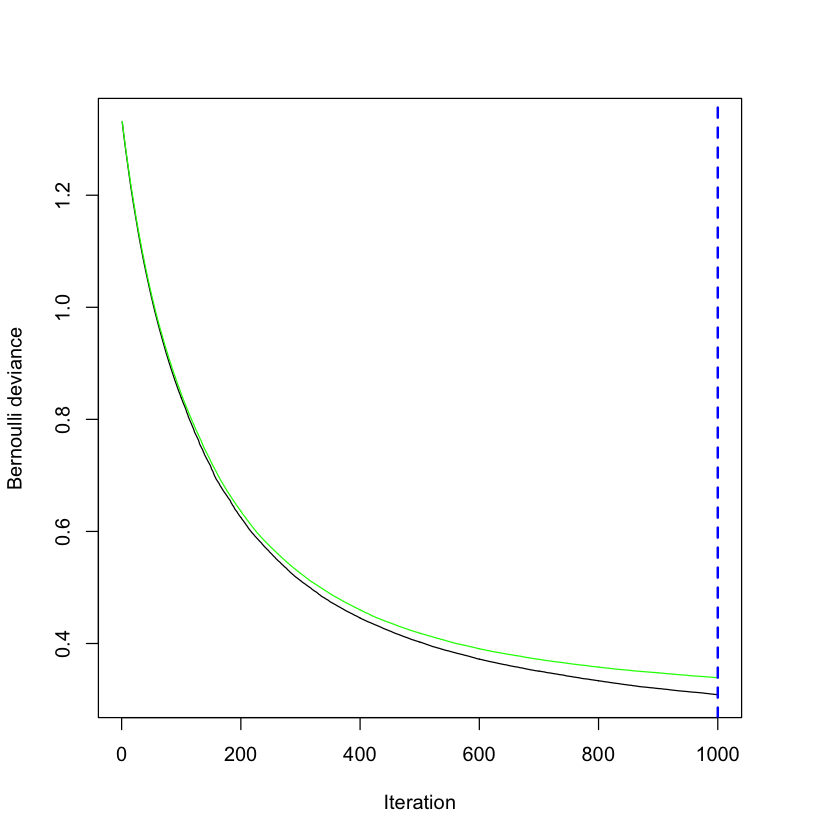

In [24]:
(best_iter = gbm.perf(data_gbm, method="cv"))

In [41]:
yhat_gbm <- predict(data_gbm, n.trees=best_iter, newdata=testData)

In [42]:
### 실측값과 예측값 상관계수 확인
cor(yhat_gbm, testData $type)

[1] 0.8628178

### 편의존 플로 (partial dependence plot)

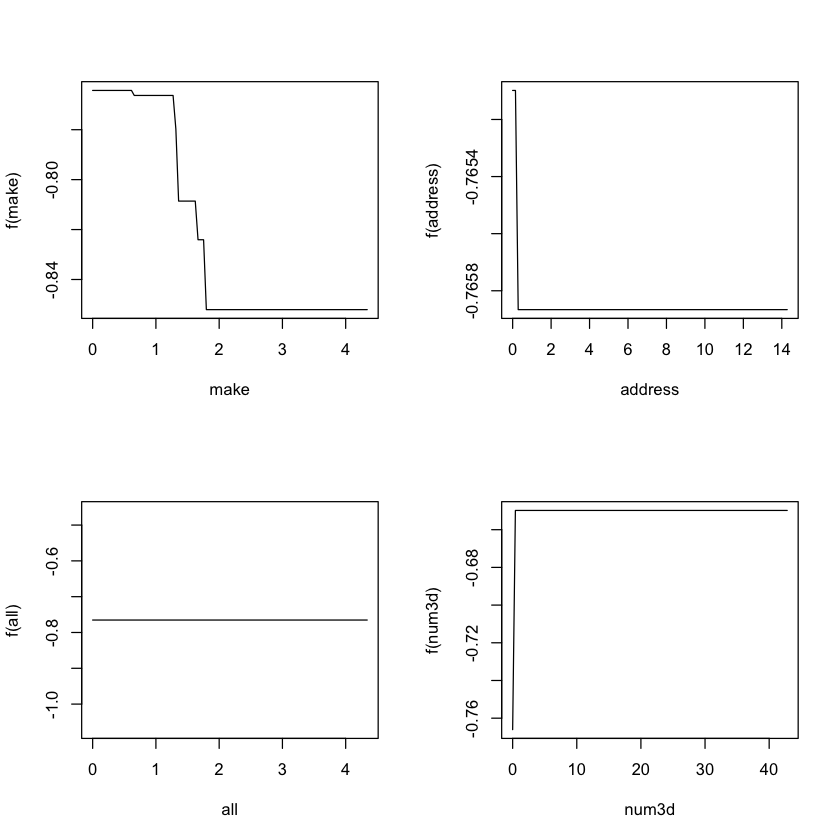

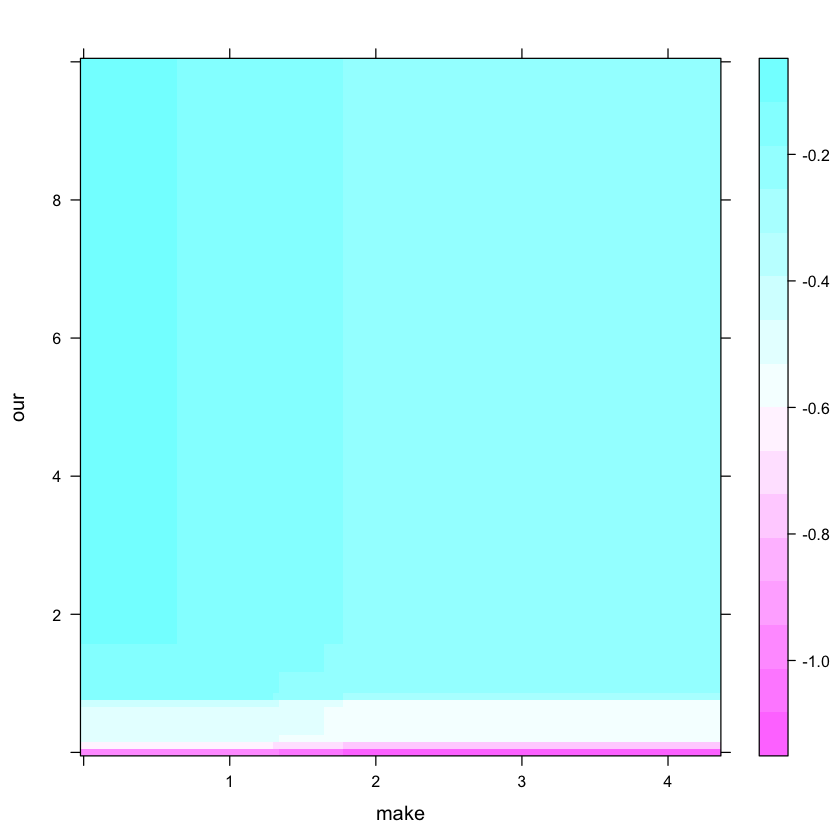

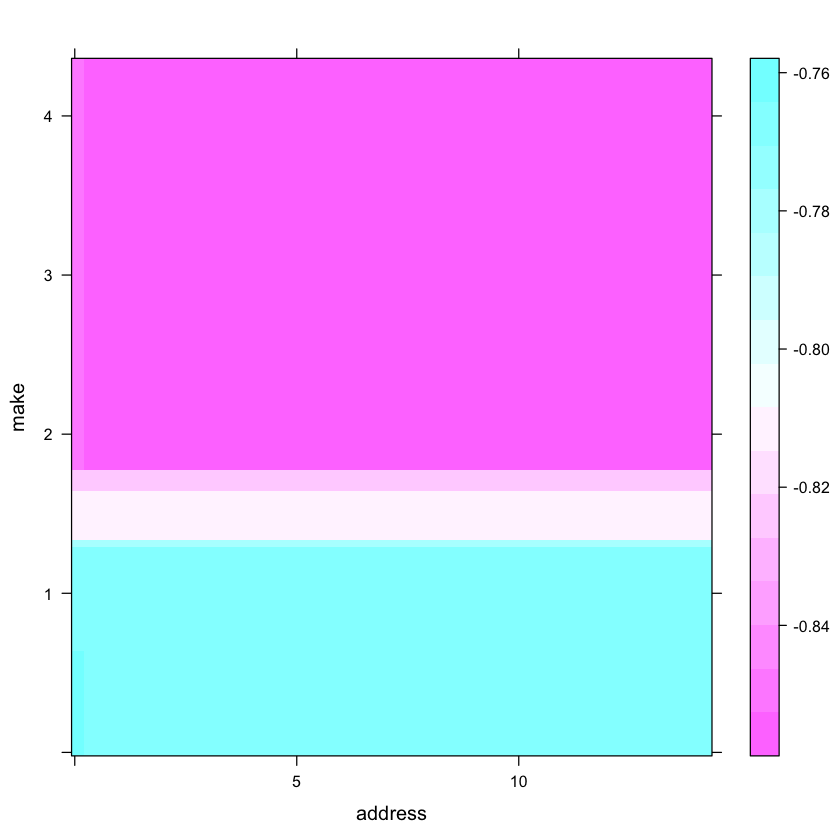

In [40]:
par(mfrow=c(2,2))

plot(data_gbm, i.var=1, ylim=c(6,20), n.tree=best_iter)
plot(data_gbm, i.var=2, ylim=c(6,20), n.tree=best_iter)
plot(data_gbm, i.var=3, ylim=c(6,20), n.tree=best_iter)
plot(data_gbm, i.var=4, ylim=c(6,20), n.tree=best_iter)

plot(data_gbm, i.var=c(1,5),n.tree=best_iter)
plot(data_gbm, i.var=c(2,1),n.tree=best_iter)